In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
!ls

BPT_diagram.ipynb
data_rbaier.csv
data_rbaier.fit
Informe_Modulo_3_Observacional_FrancoPiraino.pdf
Metodo_Bootstrapping.ipynb
ref.bib
reference.txt
SDSS_A2065_BPT_info.csv
SDSS_catalogue_A2065_final.csv
SDSS_catalogue_A2065_final.fits
SDSS_catalogue_for_A2065.ipynb
SDSS_table_A2065_BTP.csv
SDSS_table_A2065.csv
SDSS_table_A2065_filter2.csv
SDSS_table_A2065_filter.csv
SDSS_table_A2065.fits
Stellar_Mass_KS_Test.ipynb


In [8]:
### Leemos la tabla del catalogo de SDDS
#tabla = pd.read_csv("SDSS_table_A2065_filter2.csv")
tabla = pd.read_csv("SDSS_catalogue_A2065_final.csv")
tabla.columns

Index(['Unnamed: 0', 'col1', 'ra', 'dec', 'type', 'u', 'g', 'r', 'i', 'z',
       'modelMagErr_u', 'modelMagErr_g', 'modelMagErr_r', 'modelMagErr_i',
       'modelMagErr_z', 'specobjid', 'redshift', 'redshiftErr', 'h_alpha_flux',
       'h_beta_flux', 'oiii_5007_flux', 'nii_6584_flux', 'sii_6717_flux',
       'sii_6731_flux', 'oi_6300_flux', 'h_alpha_flux_err', 'h_beta_flux_err',
       'oiii_5007_flux_err', 'nii_6584_flux_err', 'sii_6717_flux_err',
       'sii_6731_flux_err', 'oi_6300_flux_err', 'logMass', 'logMass_err',
       'Log_NII_on_Halpha', 'Log_OIII_on_Hbeta', 'Log_NII_on_Halpha_err',
       'Log_OIII_on_Hbeta_err', 'Category'],
      dtype='object')

In [9]:
len(tabla)

998

El diagrama BPT utilizado en este código sigue el trabajao de Kewley et al. 2011:

\begin{equation}
    log_{10} ([OIII]\lambda 5007/H\beta) = 0.61/(log_{10} ([NII]\lambda 6584 / H\alpha) - 0.47) + 1.19 
\end{equation}


\begin{equation}
log_{10} ([OIII]\lambda 5007/H\beta) = 0.61/[log([NII]\lambda 6584 / H\alpha) - 0.05] + 1.3
\end{equation}

In [10]:
Log1_NII_Ha = np.linspace(0.01,2.5,50)
Log1_OIII_Hb = 0.61/(np.log10(Log1_NII_Ha) - 0.47) + 1.19  

Log2_NII_Ha = np.linspace(0.01,1.,50)
Log2_OIII_Hb =  0.61/(np.log10(Log2_NII_Ha) - 0.05) + 1.3

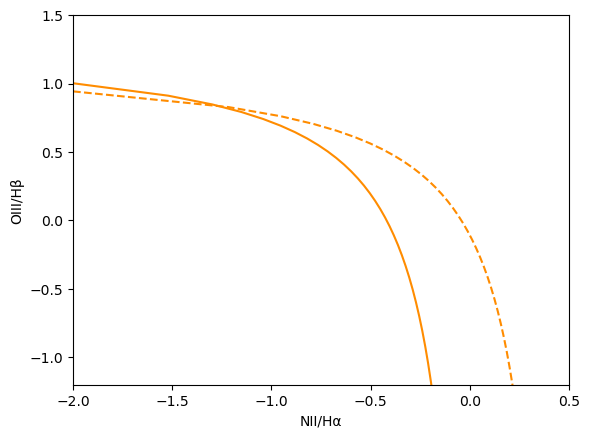

In [11]:
## plt.figure(figsize=(8,8))

plt.plot(np.log10(Log1_NII_Ha),Log1_OIII_Hb,color='darkorange',ls='--')
plt.plot(np.log10(Log2_NII_Ha),Log2_OIII_Hb,color='darkorange')

plt.xlabel("NII/Hα")
plt.ylabel("OIII/Hβ")
plt.xlim(-2.0,0.5)
plt.ylim(-1.2,1.5)
#plt.legend(title="Valores de H [Tesla]")
plt.show()

In [12]:
### Sacamos las columnas de los flujos con sus respectivos errores
Hα, Hα_err = tabla.h_alpha_flux, tabla.h_alpha_flux_err
Hβ, Hβ_err = tabla.h_beta_flux, tabla.h_beta_flux_err
OIII, OIII_err = tabla.oiii_5007_flux, tabla.oiii_5007_flux_err
NII, NII_err = tabla.nii_6584_flux, tabla.nii_6584_flux_err

# Por lo tanto la fraccion de flujo para el diagrama BTP sería
log10_NII_Hα = np.log10(NII/Hα)
log10_OIII_Hβ = np.log10(OIII/Hβ)

In [13]:
### Propagacion de errores

# NII/Hα
log10_NII_Hα_err2 = (NII_err/NII)**2 + (Hα_err/Hα)**2
log10_NII_Hα_err = np.sqrt(log10_NII_Hα_err2)

# OIII/H\beta
log10_OIII_Hβ_err2 = (OIII_err/OIII)**2 + (Hβ_err/Hβ)**2
log10_OIII_Hβ_err = np.sqrt(log10_OIII_Hβ_err2)

In [14]:
#tabla['Log_NII_on_Halpha'] = log10_NII_Hα
#tabla['Log_OIII_on_Hbeta'] = log10_OIII_Hβ
#tabla['Log_NII_on_Halpha_err'] = log10_NII_Hα_err
#tabla['Log_OIII_on_Hbeta_err'] = log10_OIII_Hβ_err

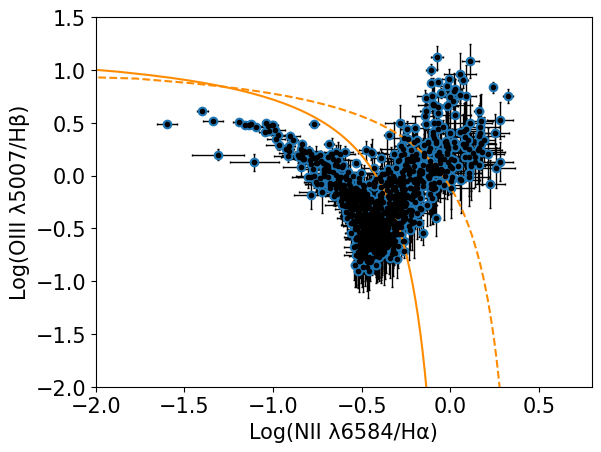

In [16]:
#%matplotlib inline
#plt.figure(figsize=(12,8))

Log1_NII_Ha = np.linspace(0.00001,2.5,150)
Log1_OIII_Hb = 0.61/(np.log10(Log1_NII_Ha) - 0.47) + 1.19  

Log2_NII_Ha = np.linspace(0.00001,1.,150)
Log2_OIII_Hb =  0.61/(np.log10(Log2_NII_Ha) - 0.05) + 1.3

### Errores
plt.errorbar(log10_NII_Hα,log10_OIII_Hβ,xerr=log10_NII_Hα_err,yerr=log10_OIII_Hβ_err,fmt='.',capsize=1,color='black',elinewidth=1)


## SDSS catalogue
plt.plot(log10_NII_Hα,log10_OIII_Hβ,'o')#,markersize=2)

#Kewley+2011
plt.plot(np.log10(Log1_NII_Ha),Log1_OIII_Hb,color='darkorange',ls='--')
plt.plot(np.log10(Log2_NII_Ha),Log2_OIII_Hb,color='darkorange')

plt.xlabel("Log(NII λ6584/Hα)",fontsize=15)
plt.ylabel("Log(OIII λ5007/Hβ)",fontsize=15)
plt.xlim(-2.0,0.8)
plt.ylim(-2,1.5)
plt.tick_params(axis='both',which='major',labelsize=15)
#plt.xlim(-4.5,3.1)
#plt.ylim(-2.5,3.)
#plt.legend(title="Valores de H [Tesla]")
plt.show()

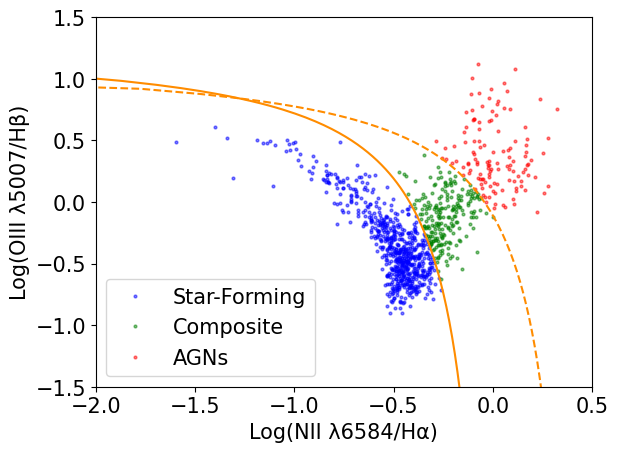

In [105]:
### Separamos las galaxias en: Star-forming, Composite, AGNs

#0.61/(np.log10(Log2_NII_Ha) - 0.05) + 1.3

## STAR Forming
filtro_xSF = tabla#[tabla.Log_NII_on_Halpha < np.max(np.log10(Log2_NII_Ha))]
filtro_ySF = filtro_xSF[(filtro_xSF.Log_OIII_on_Hbeta < 0.61/(filtro_xSF.Log_NII_on_Halpha - 0.05) + 1.3) & (filtro_xSF.Log_OIII_on_Hbeta < 0.61/(filtro_xSF.Log_NII_on_Halpha - 0.47) + 1.19)]
SF_x = filtro_ySF.Log_NII_on_Halpha
SF_y = filtro_ySF.Log_OIII_on_Hbeta

## Composite
filtro_xC = tabla#[(tabla.Log_NII_on_Halpha >= -1.5) & (tabla.Log_NII_on_Halpha < np.max(np.log10(Log1_NII_Ha))) ]
filtro_yC = filtro_xC[(filtro_xC.Log_OIII_on_Hbeta >= 0.61/(filtro_xC.Log_NII_on_Halpha - 0.05) + 1.3) & (filtro_xC.Log_OIII_on_Hbeta < 0.61/(filtro_xC.Log_NII_on_Halpha - 0.47) + 1.19)]
C_x = filtro_yC.Log_NII_on_Halpha
C_y = filtro_yC.Log_OIII_on_Hbeta

## AGNs
filtro_xA = tabla#[(tabla.Log_NII_on_Halpha >= -1.5) & (tabla.Log_NII_on_Halpha < np.max(np.log10(Log1_NII_Ha))) ]
filtro_yA = filtro_xA[(filtro_xA.Log_OIII_on_Hbeta >= 0.61/(filtro_xA.Log_NII_on_Halpha - 0.47) + 1.19)]
A_x = filtro_yA.Log_NII_on_Halpha
A_y = filtro_yA.Log_OIII_on_Hbeta


## SDSS catalogue
plt.plot(SF_x,SF_y,'o',color='blue',markersize=2,alpha=0.5,label='Star-Forming')
plt.plot(C_x,C_y,'o',color='green',markersize=2,alpha=0.5,label='Composite')
plt.plot(A_x,A_y,'o',color='red',markersize=2,alpha=0.5,label='AGNs')



#Kewley+2011
plt.plot(np.log10(Log1_NII_Ha),Log1_OIII_Hb,color='darkorange',ls='--')
plt.plot(np.log10(Log2_NII_Ha),Log2_OIII_Hb,color='darkorange')

plt.xlabel("Log(NII λ6584/Hα)",fontsize=15)
plt.ylabel("Log(OIII λ5007/Hβ)",fontsize=15)
plt.xlim(-2.0,0.5)
plt.ylim(-1.5,1.5)
plt.tick_params(axis='both',which='major',labelsize=15)
#plt.xlim(-4.5,3.1)
#plt.ylim(-2.5,3.)
plt.legend(fontsize=15)
plt.show()

In [106]:
len(SF_x)

654

In [107]:
len(C_x)

219

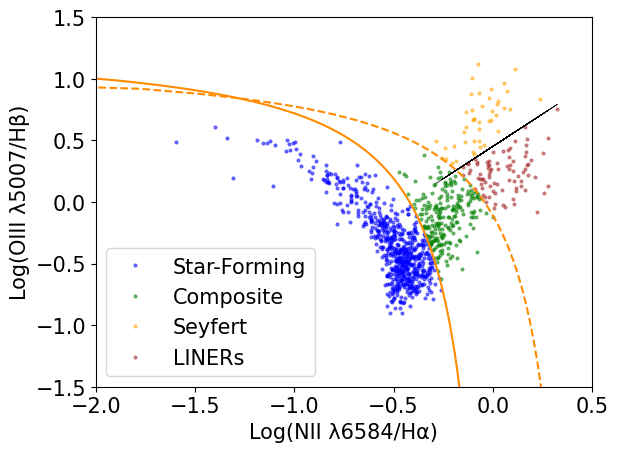

In [108]:
### Separamos las AGNs en Seyfert & Liners
#%matplotlib inline notebook
#log([O III]/Hβ) = 1.05 log([N II]/Hα) + 0.45. 

line =  1.05*filtro_yA.Log_NII_on_Halpha + 0.45

## Seyferts
S_x = filtro_yA[filtro_yA.Log_OIII_on_Hbeta > line].Log_NII_on_Halpha
S_y = filtro_yA[filtro_yA.Log_OIII_on_Hbeta > line].Log_OIII_on_Hbeta

## LINERS
L_x = filtro_yA[filtro_yA.Log_OIII_on_Hbeta < line].Log_NII_on_Halpha
L_y = filtro_yA[filtro_yA.Log_OIII_on_Hbeta < line].Log_OIII_on_Hbeta



## SDSS catalogue
plt.plot(SF_x,SF_y,'o',color='blue',markersize=2,alpha=0.5,label='Star-Forming')
plt.plot(C_x,C_y,'o',color='green',markersize=2,alpha=0.5,label='Composite')
#plt.plot(A_x,A_y,'o',color='red',markersize=2,alpha=0.5,)
plt.plot(S_x,S_y,'o',color='orange',markersize=2,alpha=0.5,label='Seyfert')
plt.plot(L_x,L_y,'o',color='brown',markersize=2,alpha=0.5,label='LINERs')


#Kewley+2011
plt.plot(np.log10(Log1_NII_Ha),Log1_OIII_Hb,color='darkorange',ls='--')
plt.plot(np.log10(Log2_NII_Ha),Log2_OIII_Hb,color='darkorange')
plt.plot(filtro_yA.Log_NII_on_Halpha,line,color='k',lw=0.5)

plt.xlabel("Log(NII λ6584/Hα)",fontsize=15)
plt.ylabel("Log(OIII λ5007/Hβ)",fontsize=15)
plt.xlim(-2.0,0.5)
plt.ylim(-1.5,1.5)
#plt.xlim(-4.5,3.1)
#plt.ylim(-2.5,3.)
plt.tick_params(axis='both',which='major',labelsize=15)
plt.legend(fontsize=15)
plt.show()

In [109]:
len(S_x)

43

In [110]:
len(L_x)

82

In [111]:
SF_x.index

Int64Index([  0,   1,   7,   8,  11,  12,  13,  14,  15,  18,
            ...
            986, 987, 988, 989, 990, 992, 993, 994, 996, 997],
           dtype='int64', length=654)

In [60]:
#filtro_xSF[(filtro_xSF.Log_OIII_on_Hbeta < 0.61/(filtro_xSF.Log_NII_on_Halpha - 0.05) + 1.3) & (filtro_xSF.Log_OIII_on_Hbeta < 0.61/(filtro_xSF.Log_NII_on_Halpha - 0.47) + 1.19)]
"""
tabla['Category'] = np.zeros(len(tabla.col1))

for i in SF_x.index:
        tabla['Category'][i] = 'SF'

for j in C_x.index:
    tabla['Category'][j] = 'Comp.'
                             
for k in S_x.index:
    tabla['Category'][k] = 'Seyfert'

for l in L_x.index:
    tabla['Category'][l] = 'Liner'                                                        
"""

/tmp/ipykernel_4504/2010557155.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabla['Category'][i] = 'SF'


In [62]:
#tabla.to_csv("SDSS_A2065_BPT_info.csv")